# **Exploratory Data Analysis on IPL Dataset**

**Importing the Libraries**

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [98]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [99]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [100]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [101]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


**Renaming Team Names to Short Abbreviations**

In [102]:
team_short_names = {
    "Chennai Super Kings": "CSK",
    "Mumbai Indians": "MI",
    "Royal Challengers Bangalore": "RCB",
    "Kolkata Knight Riders": "KKR",
    "Rajasthan Royals": "RR",
    "Delhi Capitals": "DC",
    "Sunrisers Hyderabad": "SRH",
    "Kings XI Punjab": "KXIP",
    "Punjab Kings": "PBKS",
    "Deccan Chargers": "DCG",
    "Gujarat Titans": "GT",
    "Lucknow Super Giants": "LSG",
    "Rising Pune Supergiant": "RPS",
    "Rising Pune Supergiants": "RPSG",
    "Pune Warriors": "PW",
    "Delhi Daredevils": "DD"
}

matches["winner_short"] = matches["winner"].map(team_short_names)

**Renaming Stadiums to Short Abbreviations**

In [103]:
stadium_short = {
    'M Chinnaswamy Stadium': 'Chinnaswamy',
    'Wankhede Stadium': 'Wankhede',
    'Eden Gardens': 'Eden Gardens',
    'MA Chidambaram Stadium, Chepauk': 'Chepauk',
    'Arun Jaitley Stadium': 'Delhi Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Uppal'
}

matches['venue_short'] = matches['venue'].map(stadium_short)

**Extract the Insights**

In [104]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

1. Most Winning Teams🏆

In [105]:
top_teams = matches['winner_short'].value_counts().head(10)

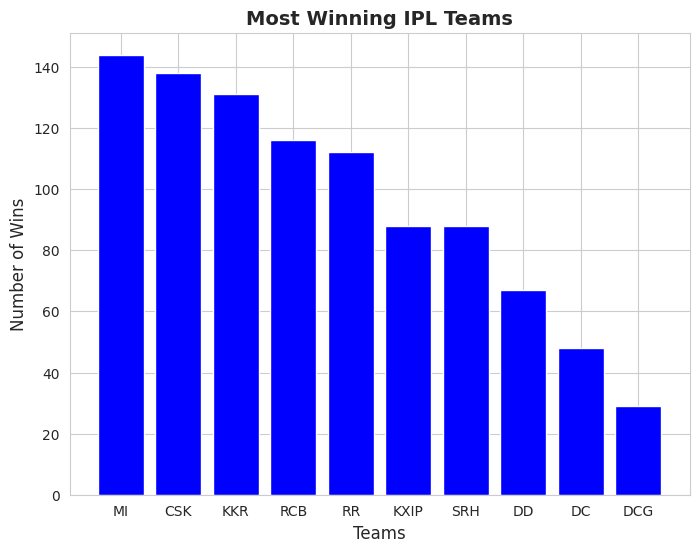

In [106]:
plt.bar(top_teams.index, top_teams.values,color='blue')
plt.title("Most Winning IPL Teams",fontsize=14, fontweight='bold')
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Wins",fontsize=12)
plt.show()

2. Top Scores(Batsmen)🏏

In [107]:
top_scorers = deliveries.groupby('batter')["batsman_runs"].sum().sort_values(ascending=False).head()

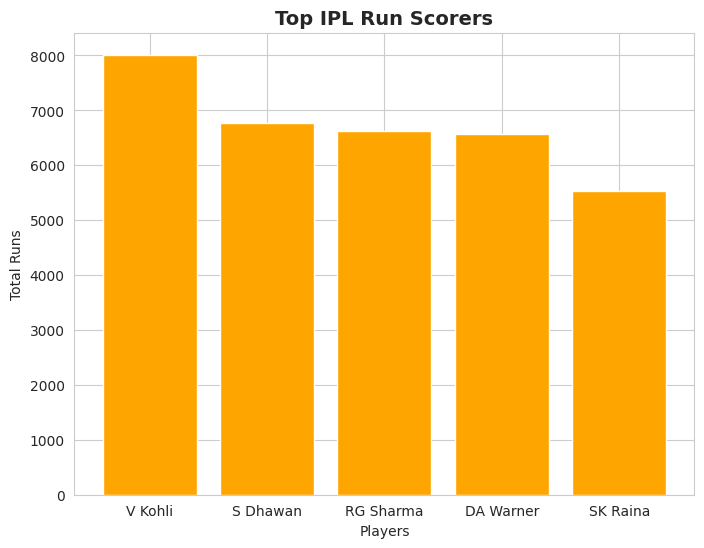

In [108]:
plt.bar(top_scorers.index, top_scorers.values,color='orange')
plt.title("Top IPL Run Scorers",fontsize=14, fontweight='bold')
plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.show()

3. Stadium / Venue Trends 🏟

In [109]:
venue_matches = matches["venue_short"].value_counts().head(10)

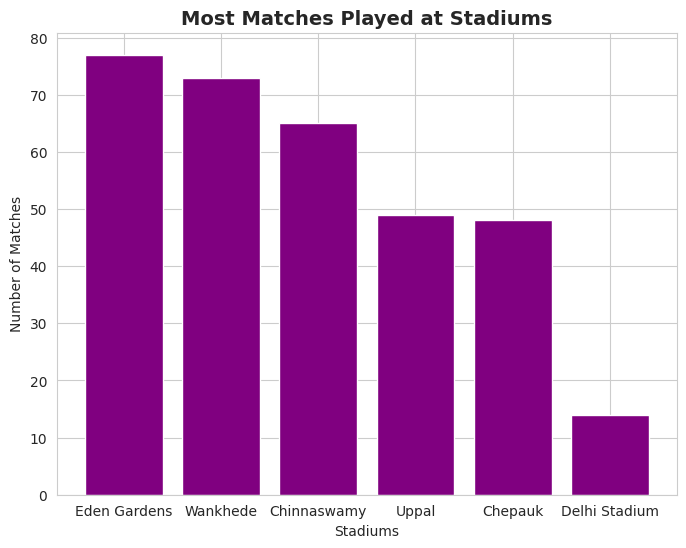

In [110]:
plt.bar(venue_matches.index, venue_matches.values,color='purple')
plt.title("Most Matches Played at Stadiums",fontsize=14, fontweight='bold')
plt.xlabel("Stadiums")
plt.ylabel("Number of Matches")
plt.show()